## 收集

###### 导入需要的Python包

In [59]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.set(style="darkgrid")

% matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

###### 定义函数

In [60]:
def tweet_json():
    """此函数通过读取文件tweet_json.txt来提取推特的id，转发次数和喜欢的次数"""
    tweet_json = []
    with open('tweet_json.txt') as file:
        for line in file:
            data = json.loads(line)
            tid = str(data['id'])
            retweet_count = data['retweet_count']
            favorite_count = data['favorite_count']
            lis = [tid, retweet_count, favorite_count]
            #[print(k) for k, v in data.items()]
            tweet_json.append(lis)
    return tweet_json
lis = tweet_json()

###### 使用requests下载tsv文件

In [61]:
url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
r = requests.get(url)
with open("./image-predictions.tsv", 'wb') as fd:
    fd.write(r.content)

###### 使用pandas读取CSV和TSV文件

In [62]:
df_image = pd.read_csv('./image-predictions.tsv', sep='\t')
df_twitter = pd.read_csv('./twitter-archive-enhanced.csv')

###### 调用函数tweet_json获取推特的id，转发次数和喜欢的次数的内容

In [63]:
add_data = pd.DataFrame(lis, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## 评估

#### 对数据集`image-predictions.csv`的评估

In [64]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1080,718234618122661888,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,malamute,0.370152,True,Siberian_husky,0.356398,True,Eskimo_dog,0.271042,True
927,702671118226825216,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1,bloodhound,0.381227,True,Sussex_spaniel,0.212017,True,clumber,0.128622,True
1263,749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True


In [66]:
type(df_image.tweet_id[0])

numpy.int64

In [67]:
sum(df_image.duplicated())

0

#### 对数据集`twitter-archive-enhanced.csv`的评估

In [68]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
type(df_twitter.retweeted_status_timestamp[0])

float

In [70]:
df_twitter[df_twitter.text.str.extract('(/\d{1,2})') != '/10']

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [71]:
df_twitter.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None
1440,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None
1045,743595368194129920,NaN,NaN,2016-06-17 00:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harold. He looks slippery af. Probably...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
1341,704847917308362754,NaN,NaN,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/704847917...,12,10,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
1695,681261549936340994,NaN,NaN,2015-12-27 23:53:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681261549...,9,10,Panda,None,None,None,None


#### 对附加数据的评估

In [72]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [73]:
sum(add_data.duplicated())

0

In [74]:
add_data.sample(20)

,tweet_id,retweet_count,favorite_count
194,854482394044301312,7546,30979
1511,690989312272396288,3264,6484
1503,691675652215414786,573,2107
736,780601303617732608,3810,13464
1016,746757706116112384,4411,10466
1437,696877980375769088,798,2676
554,803380650405482500,2155,8575
1815,676590572941893632,142,992
1036,744223424764059648,423,1857
604,798209839306514432,2947,11508


#### 质量
##### `df_image` 表
- p1, p2, p3字段中存在大小写字母和"_"，"-"使用不一致的问题
- `tweet_id`字段应该使用字符串类型  

##### `df_twitter` 表
- `tweet_id`字段应该使用字符串类型
- 存在大量缺失数据，包括(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)(以retweeted开始不为null的字段属于转发)  
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id这四个字段的值是浮点型数据，而不是字符串(以retweeted开始不为null的字段属于转发, 而in_reply_to开头的字段可以使用不到可以删除)
- retweeted_status_timestamp是浮点类型，而不是日期类型(属于转发)
- timestamp是字符串型数据，而不是日期类型数据
- 评级通常以10为分母，也就是说`rating_denominator`应该为10，所以`rating_denominator`出现很多错误的评级

#### 清洁度
##### `df_twitter` 表
- 为了探究每个回复的用户是从使用什么客户端访问的推特需要把`source`字段的内容提取出来
- 把三个表中需要用到的字段合并到一个表，构建新的表`twitter_archive_master`

## 清理

#### 清理数据之前先把原始数据进行备份

In [75]:
image_clean = df_image.copy()
twitter_clean = df_twitter.copy()
add_clean = add_data.copy()

### 质量
#### 表`df_image`和表`df_twitter`的`tweet_id`字段应该使用字符串类型

##### 定义
使用pandas的**astpye**的方法，把`tweet_id`转化为字符类型

##### 代码

In [76]:
image_clean['tweet_id'] = image_clean.tweet_id.astype('str')

In [77]:
twitter_clean['tweet_id'] = twitter_clean.tweet_id.astype('str')

##### 测试

In [78]:
### 查看df_image表的tweet_id字段的值是否转化为字符串类型
type(image_clean.tweet_id[0])

str

In [79]:
### 查看df_twitter表的tweet_id字段的值是否转化为字符串类型
type(twitter_clean.tweet_id[0])

str

#### 表`df_image`：p1, p2, p3字段中存在大小写字母和"_"，"-"使用不一致的问题

##### 定义
首先使用**lower**把p1, p2, p3值统一改为小写字母，然后使用**replace**把"-"转化为"_"

##### 代码

In [80]:
image_clean['p1'] = image_clean.p1.str.lower().str.replace('-', '_')

In [81]:
image_clean['p2'] = image_clean.p2.str.lower().str.replace('-', '_')

In [82]:
image_clean['p3'] = image_clean.p3.str.lower().str.replace('-', '_')

##### 测试

In [83]:
image_clean[['p1', 'p2', 'p3']].sample(20)

,p1,p2,p3
1569,cocker_spaniel,golden_retriever,jigsaw_puzzle
189,airedale,norfolk_terrier,lakeland_terrier
634,pomeranian,keeshond,schipperke
864,toy_poodle,miniature_poodle,norfolk_terrier
2053,basset,redbone,weimaraner
2036,pembroke,cardigan,chihuahua
1690,border_collie,cardigan,collie
241,english_springer,brittany_spaniel,welsh_springer_spaniel
672,leonberg,chow,german_shepherd
942,otter,mink,sea_lion


#### 表`df_twitter`: 存在大量缺失数据，包括(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)(以retweeted开始不为null的字段属于转发)

##### 定义
以retweeted_开始不为null的字段属于转发数据，因此删除以retweeted开始的字段中不为Null值的数据

#### 代码

In [84]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]

#### 测试

In [85]:
twitter_clean[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()

retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

#### 表`df_twitter`：timestamp是字符串型数据，而不是日期类型数据

##### 定义
通过**to_datetime**转化为日期类型

##### 代码

In [86]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean.timestamp)

##### 测试

In [87]:
type(twitter_clean.timestamp[0])

pandas._libs.tslib.Timestamp

#### 评级通常以10为分母，也就是说rating_denominator应该为10，所以rating_denominator出现很多错误的评级

##### 定义
错误的评级会影响研究数据时得到的结果，所以这些错误的数据应该删掉

##### 代码

In [88]:
error_rate_index = twitter_clean[twitter_clean.text.str.extract('(/\d{1,2})') != '/10'].index
twitter_clean.drop(error_rate_index, inplace=True)

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


##### 测试

In [89]:
twitter_clean[twitter_clean.text.str.extract('(/\d{1,2})') != '/10']

D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 清洁度

#### 表`df_twitter`：为了探究每个用户是从使用什么客户端访问的推特需要把source字段的内容提取出来

##### 定义
使用正则把source里面的内容提取出来, 新增字段client存放，并删除字段source

##### 代码

In [90]:
twitter_clean['client'] = twitter_clean.source.str.extract('>Twitter for ([a-zA-z]*?)<', expand=True)
twitter_clean = twitter_clean.drop('source', axis=1)

In [91]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2153 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2153 non-null datetime64[ns]
text                          2153 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2099 non-null object
rating_numerator              2153 non-null int64
rating_denominator            2153 non-null int64
name                          2153 non-null object
doggo                         2153 non-null object
floofer                       2153 non-null object
pupper                        2153 non-null object
puppo                         2153 non-null object
client                        2020 non-null object
dtypes: datetime64[ns](1), fl

#### 把三个表中需要用到的字段合并到一个表，构建新的表twitter_archive_master

##### 定义
合并数据集，并删除不需要的字段

##### 代码

In [92]:
### 通过add_clean和twitter_clean表中的tweet_id字段合并数据集
twitter_archive_master = pd.merge(add_clean, twitter_clean, on='tweet_id')

In [93]:
### 删除不需要的字段
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'expanded_urls', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_master = twitter_archive_master.drop(columns, axis=1)

In [94]:
twitter_archive_master = pd.merge(twitter_archive_master, image_clean, on='tweet_id')

### 评估

In [95]:
twitter_archive_master.isnull().sum()

tweet_id               0
retweet_count          0
favorite_count         0
timestamp              0
text                   0
rating_numerator       0
rating_denominator     0
name                   0
client                39
jpg_url                0
img_num                0
p1                     0
p1_conf                0
p1_dog                 0
p2                     0
p2_conf                0
p2_dog                 0
p3                     0
p3_conf                0
p3_dog                 0
dtype: int64

In [96]:
twitter_archive_master[twitter_archive_master.client.isnull()]

,tweet_id,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,client,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
162,852226086759018497,7530,21318,2017-04-12 18:25:07,Meet General. He wasn't content with the quali...,14,10,General,NaN,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
207,841314665196081154,5283,17224,2017-03-13 15:47:01,This is Max. There's no way in h*ck you're tak...,13,10,Max,NaN,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,afghan_hound,0.903712,True,saluki,0.035215,True,bloodhound,0.026565,True
261,831315979191906304,1261,7087,2017-02-14 01:35:49,I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,NaN,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft_coated_wheaten_terrier,0.009084,True,bouvier_des_flandres,0.004693,True
578,772877495989305348,4462,9525,2016-09-05 19:22:09,You need to watch these two doggos argue throu...,11,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,norwegian_elkhound,0.138523,True,wombat,0.074217,False
601,768970937022709760,7503,15958,2016-08-26 00:38:52,This is Kirby. His bowl weighs more than him. ...,12,10,Kirby,NaN,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
645,760290219849637889,13070,29503,2016-08-02 01:44:48,This is Rocco. He's doing his best. 13/10 some...,13,10,Rocco,NaN,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,old_english_sheepdog,0.302200,True,lhasa,0.258803,True,briard,0.179200,True
716,750086836815486976,612,2375,2016-07-04 22:00:12,This is Spanky. He was a member of the 2002 US...,12,10,Spanky,NaN,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,brabancon_griffon,0.003061,True
718,750056684286914561,1006,3429,2016-07-04 20:00:23,This is Jameson. He had a few too many in the ...,11,10,Jameson,NaN,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,saluki,0.484428,True,borzoi,0.263550,True,labrador_retriever,0.077004,True
719,750041628174217216,701,3484,2016-07-04 19:00:33,This is Beau. He's trying to keep his daddy fr...,13,10,Beau,NaN,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,1,labrador_retriever,0.252031,True,maltese_dog,0.188090,True,golden_retriever,0.133017,True
720,750026558547456000,884,2973,2016-07-04 18:00:41,Meet Jax &amp; Jil. Jil is yelling the pledge ...,10,10,Jax,NaN,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True


In [97]:
twitter_archive_master.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1976.000000,1976.000000,1976.000000,1976.0,1976.000000,1976.000000,1.976000e+03,1.976000e+03
mean,2767.992409,8933.756579,11.698381,10.0,1.202935,0.593646,1.347591e-01,6.018989e-02
std,4713.692539,12410.630095,40.851248,0.0,0.561022,0.272086,1.008010e-01,5.077157e-02
min,15.000000,81.000000,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,618.000000,1947.500000,10.000000,10.0,1.000000,0.362063,5.411538e-02,1.605498e-02
50%,1346.500000,4121.500000,11.000000,10.0,1.000000,0.587440,1.181350e-01,4.952715e-02
75%,3206.500000,11329.500000,12.000000,10.0,1.000000,0.844247,1.955618e-01,9.162278e-02
max,79116.000000,132318.000000,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01


In [98]:
twitter_archive_master.duplicated().sum()

0

In [99]:
twitter_archive_master.sample(20)

,tweet_id,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,client,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
137,858843525470990336,3746,16242,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,13,10,None,iPhone,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,labrador_retriever,0.286059,True,bloodhound,0.026917,True
370,813112105746448384,3208,11462,2016-12-25 20:00:07,Meet Toby. He's pupset because his hat isn't b...,12,10,Toby,iPhone,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,pembroke,0.140682,True,basenji,0.090819,True
1197,690360449368465409,1003,2913,2016-01-22 02:28:52,Stop sending in lobsters. This is the final wa...,9,10,the,iPhone,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,french_bulldog,0.076359,True,brabancon_griffon,0.035007,True
1208,689659372465688576,4386,11355,2016-01-20 04:03:02,This is Ricky. He's being escorted out of the ...,8,10,Ricky,iPhone,https://pbs.twimg.com/media/CZIpimOWcAETFRt.jpg,1,bustard,0.225221,False,koala,0.057625,False,goose,0.053569,False
1822,668826086256599040,150,465,2015-11-23 16:18:59,This is Banditt. He is a brown LaBeouf retriev...,10,10,Banditt,iPhone,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,irish_terrier,0.153700,True,rhodesian_ridgeback,0.068457,True
601,768970937022709760,7503,15958,2016-08-26 00:38:52,This is Kirby. His bowl weighs more than him. ...,12,10,Kirby,NaN,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
1164,692905862751522816,994,2667,2016-01-29 03:03:25,This is Wally. He's being abducted by aliens. ...,10,10,Wally,iPhone,https://pbs.twimg.com/media/CZ2yNKhWEAA_7cb.jpg,1,mexican_hairless,0.162638,True,doberman,0.156287,True,rhodesian_ridgeback,0.081478,True
1629,672482722825261057,662,1212,2015-12-03 18:29:09,This is light saber pup. Ready to fight off ev...,10,10,light,iPhone,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,1,west_highland_white_terrier,0.586173,True,borzoi,0.206620,True,great_pyrenees,0.060653,True
1289,684241637099323392,3711,8956,2016-01-05 05:14:53,This is Obi. He got camera shy. 12/10 https://...,12,10,Obi,iPhone,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,1,pembroke,0.508498,True,black_footed_ferret,0.115532,False,weasel,0.051280,False
640,761004547850530816,3933,12422,2016-08-04 01:03:17,This is Bo and Ty. Bo eats paper and Ty felt l...,11,10,Bo,iPhone,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,sussex_spaniel,0.064897,True,labrador_retriever,0.047704,True


In [100]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 20 columns):
tweet_id              1976 non-null object
retweet_count         1976 non-null int64
favorite_count        1976 non-null int64
timestamp             1976 non-null datetime64[ns]
text                  1976 non-null object
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
name                  1976 non-null object
client                1937 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null int64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null bool
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null bool
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null bool
dtypes: bool(3), datetime64[ns](1

#### 质量
- client字段有39条缺失数据，因为数据量并不大，而且可能是用户为了隐私安全，没有给推特开放权限，所以获取不到
#### 清洁度
- 分母一般是固定的10，所以可以删掉

## 清理

### 质量

#### client字段有39条缺失数据，因为数据量并不大，而且可能是用户为了隐私安全，没有给推特开放权限，所以获取不到

##### 定义
把39条缺失数据定义为其他设备用户，用other表示

##### 代码

In [101]:
twitter_archive_master['client'] = twitter_archive_master.client.astype('str')

In [102]:
twitter_archive_master['client'] = twitter_archive_master.client.str.replace('nan', 'other')

##### 测试

In [103]:
twitter_archive_master[twitter_archive_master.client == 'other']

,tweet_id,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,client,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
162,852226086759018497,7530,21318,2017-04-12 18:25:07,Meet General. He wasn't content with the quali...,14,10,General,other,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
207,841314665196081154,5283,17224,2017-03-13 15:47:01,This is Max. There's no way in h*ck you're tak...,13,10,Max,other,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,afghan_hound,0.903712,True,saluki,0.035215,True,bloodhound,0.026565,True
261,831315979191906304,1261,7087,2017-02-14 01:35:49,I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,other,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft_coated_wheaten_terrier,0.009084,True,bouvier_des_flandres,0.004693,True
578,772877495989305348,4462,9525,2016-09-05 19:22:09,You need to watch these two doggos argue throu...,11,10,None,other,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,norwegian_elkhound,0.138523,True,wombat,0.074217,False
601,768970937022709760,7503,15958,2016-08-26 00:38:52,This is Kirby. His bowl weighs more than him. ...,12,10,Kirby,other,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
645,760290219849637889,13070,29503,2016-08-02 01:44:48,This is Rocco. He's doing his best. 13/10 some...,13,10,Rocco,other,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,old_english_sheepdog,0.302200,True,lhasa,0.258803,True,briard,0.179200,True
716,750086836815486976,612,2375,2016-07-04 22:00:12,This is Spanky. He was a member of the 2002 US...,12,10,Spanky,other,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,brabancon_griffon,0.003061,True
718,750056684286914561,1006,3429,2016-07-04 20:00:23,This is Jameson. He had a few too many in the ...,11,10,Jameson,other,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,saluki,0.484428,True,borzoi,0.263550,True,labrador_retriever,0.077004,True
719,750041628174217216,701,3484,2016-07-04 19:00:33,This is Beau. He's trying to keep his daddy fr...,13,10,Beau,other,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,1,labrador_retriever,0.252031,True,maltese_dog,0.188090,True,golden_retriever,0.133017,True
720,750026558547456000,884,2973,2016-07-04 18:00:41,Meet Jax &amp; Jil. Jil is yelling the pledge ...,10,10,Jax,other,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True


### 清洁度

#### 分母一般是固定的10，所以可以删掉

##### 定义
使用drop删掉这一列

##### 代码

In [104]:
twitter_archive_master.drop('rating_denominator', axis=1, inplace=True)

##### 测试

In [105]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 19 columns):
tweet_id            1976 non-null object
retweet_count       1976 non-null int64
favorite_count      1976 non-null int64
timestamp           1976 non-null datetime64[ns]
text                1976 non-null object
rating_numerator    1976 non-null int64
name                1976 non-null object
client              1976 non-null object
jpg_url             1976 non-null object
img_num             1976 non-null int64
p1                  1976 non-null object
p1_conf             1976 non-null float64
p1_dog              1976 non-null bool
p2                  1976 non-null object
p2_conf             1976 non-null float64
p2_dog              1976 non-null bool
p3                  1976 non-null object
p3_conf             1976 non-null float64
p3_dog              1976 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 268.2+ KB


### 存储

In [106]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

### 可视化

###### iPhone用户占比多少

In [107]:
### 获取iPhone用户的个数
iPhone_user = sum(twitter_archive_master.client == 'iPhone')

### 获取所有用户的个数
all_user = len(twitter_archive_master.client)

### 得到iPhone用户所占比例
iPhone_ratio = iPhone_user / all_user

print('iPhone用户访问推特的比例为：{}%' .format(iPhone_ratio*100))

iPhone用户访问推特的比例为：98.02631578947368%


In [108]:
def dog_kind(data):
    """此函数通过传入一行数据，获取是某种狗的最大可能性，并返回狗品种的名字"""
    dog_p1 = data.p1_conf.values[0]
    dog_p2 = data.p2_conf.values[0]
    dog_p3 = data.p3_conf.values[0]
    
    name = {dog_p1: data.p1.values[0],
           dog_p2: data.p2.values[0],
           dog_p3: data.p3.values[0]}
    
    max_value = max([dog_p1, dog_p2, dog_p3])
    
    return name[max_value].replace('_', ' ')

######  转发最多的是哪个品种的狗

In [109]:
### 获取转发人数最多狗的个数
retweet_max_count = twitter_archive_master.retweet_count.max()

### 获取转发人数最多狗的索引
retweet_max_index = twitter_archive_master[twitter_archive_master.retweet_count == retweet_max_count].index

### 得到转发最多的狗的品种
retweet_dog = twitter_archive_master.iloc[retweet_max_index]
retweet_kind = dog_kind(retweet_dog)
print('转发人数最多的狗的品种是：{}' .format(retweet_kind))

转发人数最多的狗的品种是：labrador retriever


###### 转发最少的是哪个品种的狗

In [110]:
### 获取转发人数最多狗的个数
retweet_min_count = twitter_archive_master.retweet_count.min()

### 获取转发人数最多狗的索引
retweet_min_index = twitter_archive_master[twitter_archive_master.retweet_count == retweet_min_count].index

### 得到转发最多的狗的品种
retweet_dog = twitter_archive_master.iloc[retweet_min_index]
retweet_kind = dog_kind(retweet_dog)
print('转发人数最少的狗的品种是：{}' .format(retweet_kind))

转发人数最少的狗的品种是：english setter


###### 喜欢人数最多的是哪个品种的狗

In [111]:
### 获取喜欢人数最多狗的个数
favorite_max_count = twitter_archive_master.favorite_count.max()

### 获取转发人数最多狗的索引
favorite_max_index = twitter_archive_master[twitter_archive_master.favorite_count == favorite_max_count].index

### 得到转发最多的狗的品种
favorite_dog = twitter_archive_master.iloc[favorite_max_index]
favorite_kind = dog_kind(favorite_dog)
print('喜欢人数最多的狗的品种是：{}' .format(favorite_kind))

喜欢人数最多的狗的品种是：lakeland terrier


###### 喜欢人数最少的是哪个品种的狗

In [112]:
### 获取喜欢人数最多狗的个数
favorite_min_count = twitter_archive_master.favorite_count.min()

### 获取转发人数最多狗的索引
favorite_min_index = twitter_archive_master[twitter_archive_master.favorite_count == favorite_min_count].index

### 得到转发最多的狗的品种
favorite_dog = twitter_archive_master.iloc[favorite_min_index]
favorite_kind = dog_kind(favorite_dog)
print('喜欢人数最少的狗的品种是：{}' .format(favorite_kind))

喜欢人数最少的狗的品种是：english setter


###### 哪个时间段发的推特，转发次数最多

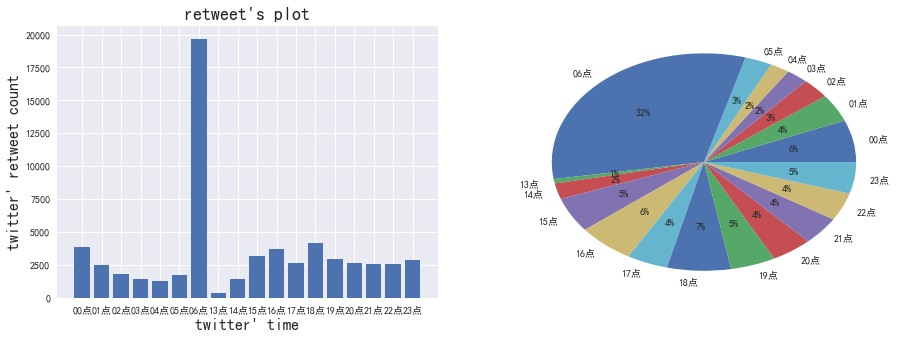

In [113]:
new = twitter_archive_master.set_index(twitter_archive_master.timestamp)
retweet = new.groupby(lambda x:x.strftime('%H')).mean().retweet_count
index = list(retweet.index)
ind = retweet.index + '点'
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(index, retweet);
plt.xlabel('twitter\' time', fontsize=16)
plt.ylabel('twitter\' retweet count', fontsize=16)
plt.title('retweet\'s plot', fontsize=18)
plt.xticks(index, ind)
plt.subplot(122)
plt.pie(retweet, labels=ind, autopct='%.0f%%');

- 通过以上观察发现每天在6点发的推特，转发人数最多
- 说明WeRateDogs在6点的时候发的推特最受大家喜欢，所以会有很多人来转发

###### WeRateDogs喜欢的狗狗比例多？

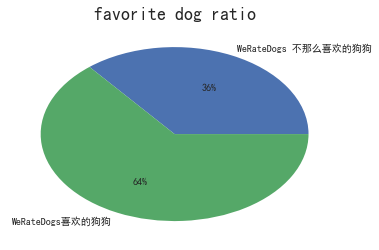

In [114]:
labels=['WeRateDogs 不那么喜欢的狗狗', 'WeRateDogs喜欢的狗狗']
more_ten = twitter_archive_master.groupby(twitter_archive_master.rating_numerator >= 10).rating_numerator.mean()
plt.pie(more_ten, labels=labels, autopct='%.0f%%');
plt.title('favorite dog ratio', fontsize=18);

- 通过观察发现人们对狗的评分还是蛮高的，说明WeRateDogs喜欢的狗狗还是很多的
- 但WeRateDogs 不那么喜欢的狗狗也是存在的，不过相对来说还是比较少
- 因为数据集的数据并不能把全世界上所有的人是否喜欢狗的评分信息都包括进去，所以这次数据的结果并不能代表WeRateDogs喜欢的狗狗一定会比WeRateDogs 不那么喜欢的狗狗多
- 但狗是那么可爱的动物谁会不喜欢呢